In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import IPython.display
import soundfile as sf
import os
import errno
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# Need a function to remove dead space from audio files
# Checks a rolling average of signal over 1/10 sec and compares to threshold
# Returns a mask of True and False values that can be used to filter audio signals

def envelope(y, sr, threshold):
    mask = []
    y_abs = pd.Series(y).apply(np.abs)
    y_mean = y_abs.rolling(window = int(sr/10), min_periods = 1, center = True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return np.array(y[mask])

In [3]:
import glob
savee_file_list = glob.glob('/Users/ioann/saveelist/*.wav')


In [4]:
def clean_files(file_list):
    count = 0

    for file in file_list:
        y, sr = librosa.load(file)
        y = envelope(y, sr, 0.0005)
        save_file = 'clean/' + file
        
        if not os.path.exists(os.path.dirname(save_file)):
            try:
                os.makedirs(os.path.dirname(save_file))
            except OSError as exc: # Guard against race condition
                if exc.errno != errno.EEXIST:
                    raise
        
        with open(save_file, 'w') as new_file:
            sf.write(save_file, y, sr)
            new_file.close()
            
        count += 1
        if count % 100 == 0:
            print('cleaned and saved 100 files')
    
    print("cleaning complete!")

In [5]:
clean_files(savee_file_list)

cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaned and saved 100 files
cleaning complete!


In [6]:
savee_clean_list = glob.glob('clean/Users/ioann/saveelist/*.wav')

In [7]:
def build_savee_index(file_list):
    
    emotion_key = {'n': 'neutral', 'h': 'happy', 'sa': 'sad', 'a': 'angry', 'f': 'fearful', 'd': 'disgusted', 'su': 'surprised'}
    df = { 'emotion': [] }
   

    for file in file_list:
        

        props = file.split('/')[3][10:]
       
        df['emotion'].append(emotion_key[props[ :-9]])
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [8]:
emotion_list = build_savee_index(savee_clean_list)

In [9]:
emotion_list

,emotion
0,angry
1,angry
2,angry
3,angry
4,angry
5,angry
6,angry
7,angry
8,angry
9,angry


In [10]:
labels = pd.DataFrame(emotion_list)

In [11]:
labels

,emotion
0,angry
1,angry
2,angry
3,angry
4,angry
5,angry
6,angry
7,angry
8,angry
9,angry


In [12]:
df = pd.DataFrame(columns=['feature'])
bookmark=0



path = '/Users/ioann/saveelist/'




for subdir, dirs, files in os.walk(path):
    for file in files:
      
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1
        
       
     
       

In [13]:
df

,feature
0,"[-320.56489703094303, 110.93380247868102, 12.4..."
1,"[-244.65867781061723, 104.24924778351834, 0.65..."
2,"[-269.98304089788536, 100.68981219664313, 4.81..."
3,"[-564.5403264861648, 104.18191308304459, 26.30..."
4,"[-299.4085271173833, 120.05930557550765, -7.83..."
5,"[-268.41515221876404, 102.6471846342612, -6.83..."
6,"[-270.43346188219135, 102.25127566034016, -7.7..."
7,"[-578.9710836117222, 153.1407478680532, 12.843..."
8,"[-337.16074928048477, 96.86674029531615, 4.881..."
9,"[-313.97857226224176, 82.6321101796106, 3.1210..."


In [14]:
df3 = pd.DataFrame(df['feature'].values.tolist())
df3

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-320.564897,110.933802,12.457851,34.670754,11.628866,-2.938117,-24.859946,-2.633693,-0.919507,-11.532021,...,1.452810,1.783171,3.263025,2.756852,3.496057,5.099579,4.885279,5.633801,4.365917,3.453820
1,-244.658678,104.249248,0.657434,41.458732,-1.098887,3.049909,-23.316795,-7.371824,-7.313963,-5.459172,...,2.513106,4.278307,4.096044,2.962424,3.240562,0.578126,1.794270,3.656604,4.363981,3.638848
2,-269.983041,100.689812,4.812852,44.206061,-9.372619,-17.481868,0.876082,2.226196,-16.333266,-3.812531,...,2.308230,4.117299,3.856427,4.716765,6.389915,5.546877,4.826904,4.839705,4.608056,4.928732
3,-564.540326,104.181913,26.302574,44.703341,17.196513,-4.453330,-15.700971,-2.773550,-5.163968,-11.310603,...,-2.580128,-1.982804,-0.331088,-2.861281,-2.723364,0.419460,2.015126,1.980087,-0.398496,-0.039357
4,-299.408527,120.059306,-7.834544,18.676239,14.225895,-2.376180,-20.357823,3.748768,4.587472,-11.664485,...,1.049761,1.525852,1.987423,0.174960,-0.661590,-0.089371,-0.488558,1.521584,1.066419,-0.393785
5,-268.415152,102.647185,-6.831019,21.777451,5.504902,2.677995,-17.891163,-4.412988,-3.229257,0.431965,...,-1.543827,0.943443,-0.501339,-0.080925,0.131035,-1.918740,1.268647,2.679410,2.754248,3.670862
6,-270.433462,102.251276,-7.766242,27.726690,-2.322103,-15.604451,0.235773,0.016892,-12.838433,-0.243834,...,0.540800,1.750614,2.308556,1.087831,0.177460,-1.091181,-0.377372,-0.434003,-0.327013,-0.177506
7,-578.971084,153.140748,12.843857,13.583781,5.480952,-4.754079,-7.061755,1.223524,-7.304688,-13.289818,...,-0.529214,-0.245226,-0.666285,-2.915523,-1.297646,-1.285307,-1.099492,0.359853,-2.147516,-1.808127
8,-337.160749,96.866740,4.881764,26.825063,10.724669,-2.182416,-13.945372,7.127122,-0.079204,-7.433390,...,2.997824,3.103378,4.924483,6.009026,6.636278,6.517982,6.425938,4.764662,3.565150,4.918953
9,-313.978572,82.632110,3.121088,25.119724,6.733781,2.579732,-13.853373,0.178914,-1.616934,1.959738,...,0.892974,0.141898,1.821391,2.529989,1.968246,2.439394,3.644267,3.000721,4.114735,5.142286


In [15]:
newdf = pd.concat([df3,labels], axis=1)

In [16]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [17]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-320.564897,110.933802,12.457851,34.670754,11.628866,-2.938117,-24.859946,-2.633693,-0.919507,-11.532021,...,1.783171,3.263025,2.756852,3.496057,5.099579,4.885279,5.633801,4.365917,3.453820,angry
1,-244.658678,104.249248,0.657434,41.458732,-1.098887,3.049909,-23.316795,-7.371824,-7.313963,-5.459172,...,4.278307,4.096044,2.962424,3.240562,0.578126,1.794270,3.656604,4.363981,3.638848,angry
2,-269.983041,100.689812,4.812852,44.206061,-9.372619,-17.481868,0.876082,2.226196,-16.333266,-3.812531,...,4.117299,3.856427,4.716765,6.389915,5.546877,4.826904,4.839705,4.608056,4.928732,angry
3,-564.540326,104.181913,26.302574,44.703341,17.196513,-4.453330,-15.700971,-2.773550,-5.163968,-11.310603,...,-1.982804,-0.331088,-2.861281,-2.723364,0.419460,2.015126,1.980087,-0.398496,-0.039357,angry
4,-299.408527,120.059306,-7.834544,18.676239,14.225895,-2.376180,-20.357823,3.748768,4.587472,-11.664485,...,1.525852,1.987423,0.174960,-0.661590,-0.089371,-0.488558,1.521584,1.066419,-0.393785,angry


In [18]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
12,-287.823871,101.515510,6.410148,15.656604,7.395868,-1.489299,-24.872378,-5.148656,-0.039547,-10.816283,...,1.922031,2.069620,1.789086,1.402842,1.192773,2.013896,2.935015,3.895297,5.941611,angry
260,-432.127466,130.331011,15.421203,32.910652,23.467361,-1.484577,-19.036167,0.314333,5.954609,-6.524187,...,0.764855,2.257194,1.738118,1.038085,1.238373,1.734420,2.330078,1.231918,1.440224,neutral
148,-340.495581,96.439813,21.219168,42.652258,-1.219512,12.036752,-25.907954,-3.376129,0.781092,-12.693077,...,4.214099,7.637096,11.883751,15.016872,15.636499,12.301138,8.042070,5.284950,3.425573,fearful
337,-465.225705,151.346358,28.000421,38.127225,9.868115,0.870507,-9.655647,-6.929020,5.113030,4.176812,...,0.538939,-0.411754,1.952185,2.514050,0.700188,0.558373,-0.027693,1.218584,1.688338,neutral
288,-422.190425,128.785296,25.661881,26.935536,17.211634,3.511938,-14.742881,0.687592,1.321263,-5.509755,...,0.684991,0.407341,1.436117,0.907008,-0.735813,-0.340283,1.214350,2.179666,1.231693,neutral
250,-405.978889,107.061765,31.556338,40.077664,2.951004,-13.124174,5.861604,2.698900,-4.866779,1.311889,...,0.253118,-0.994997,0.461636,0.465271,-0.341487,0.240919,-0.200263,-0.106715,0.810546,neutral
280,-432.696310,130.647264,22.789083,44.904304,23.801889,-1.714131,-17.877608,3.932217,0.856776,-9.977901,...,1.204498,0.662170,1.290700,1.350119,0.512094,-0.365574,0.171132,0.139680,-0.069024,neutral
456,-306.572572,109.670172,11.963575,16.871229,8.903087,1.114646,-19.945104,-3.327016,-1.510647,-9.728044,...,2.925757,5.076261,4.986268,4.139367,5.599611,7.593524,7.631419,6.697954,5.786440,surprised
161,-362.253273,104.006509,14.625180,33.239899,-2.979909,2.600910,-13.862579,-9.817516,-6.566922,3.962269,...,5.546566,5.094293,5.683984,5.993845,4.896129,5.367832,5.546755,4.691688,3.431571,fearful
36,-300.130159,122.647049,3.019568,28.961545,1.925842,-4.731266,-29.251653,-4.576898,-2.315240,-14.437467,...,1.045617,1.390836,2.190548,4.104951,5.339343,6.885227,5.573310,6.737365,6.787633,angry


In [19]:
rnewdf=rnewdf.fillna(0)

In [20]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [21]:
trainfeatures = train.iloc[:, :-1]

In [22]:
trainfeatures

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
12,-287.823871,101.515510,6.410148,15.656604,7.395868,-1.489299,-24.872378,-5.148656,-0.039547,-10.816283,...,0.094653,1.922031,2.069620,1.789086,1.402842,1.192773,2.013896,2.935015,3.895297,5.941611
260,-432.127466,130.331011,15.421203,32.910652,23.467361,-1.484577,-19.036167,0.314333,5.954609,-6.524187,...,0.475086,0.764855,2.257194,1.738118,1.038085,1.238373,1.734420,2.330078,1.231918,1.440224
148,-340.495581,96.439813,21.219168,42.652258,-1.219512,12.036752,-25.907954,-3.376129,0.781092,-12.693077,...,-2.245740,4.214099,7.637096,11.883751,15.016872,15.636499,12.301138,8.042070,5.284950,3.425573
337,-465.225705,151.346358,28.000421,38.127225,9.868115,0.870507,-9.655647,-6.929020,5.113030,4.176812,...,1.406707,0.538939,-0.411754,1.952185,2.514050,0.700188,0.558373,-0.027693,1.218584,1.688338
288,-422.190425,128.785296,25.661881,26.935536,17.211634,3.511938,-14.742881,0.687592,1.321263,-5.509755,...,0.231847,0.684991,0.407341,1.436117,0.907008,-0.735813,-0.340283,1.214350,2.179666,1.231693
250,-405.978889,107.061765,31.556338,40.077664,2.951004,-13.124174,5.861604,2.698900,-4.866779,1.311889,...,1.026799,0.253118,-0.994997,0.461636,0.465271,-0.341487,0.240919,-0.200263,-0.106715,0.810546
280,-432.696310,130.647264,22.789083,44.904304,23.801889,-1.714131,-17.877608,3.932217,0.856776,-9.977901,...,0.093268,1.204498,0.662170,1.290700,1.350119,0.512094,-0.365574,0.171132,0.139680,-0.069024
456,-306.572572,109.670172,11.963575,16.871229,8.903087,1.114646,-19.945104,-3.327016,-1.510647,-9.728044,...,3.622234,2.925757,5.076261,4.986268,4.139367,5.599611,7.593524,7.631419,6.697954,5.786440
161,-362.253273,104.006509,14.625180,33.239899,-2.979909,2.600910,-13.862579,-9.817516,-6.566922,3.962269,...,4.743016,5.546566,5.094293,5.683984,5.993845,4.896129,5.367832,5.546755,4.691688,3.431571
36,-300.130159,122.647049,3.019568,28.961545,1.925842,-4.731266,-29.251653,-4.576898,-2.315240,-14.437467,...,-1.296631,1.045617,1.390836,2.190548,4.104951,5.339343,6.885227,5.573310,6.737365,6.787633


In [23]:
trainlabel = train.iloc[:, -1:]

In [24]:
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [25]:
testlabel.shape

(93, 1)

In [26]:
trainlabel

,emotion
12,angry
260,neutral
148,fearful
337,neutral
288,neutral
250,neutral
280,neutral
456,surprised
161,fearful
36,angry


In [27]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

C:\Users\ioann\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [29]:
X_train

array([[-287.8238707 ,  101.51551026,    6.41014822, ...,    2.93501496,
           3.8952973 ,    5.94161147],
       [-432.12746605,  130.331011  ,   15.42120293, ...,    2.33007829,
           1.23191773,    1.44022361],
       [-340.49558067,   96.43981326,   21.21916801, ...,    8.04207037,
           5.28495043,    3.42557283],
       ...,
       [-450.10293482,  134.773577  ,   36.6489865 , ...,    1.1843626 ,
           1.30920473,    0.99365732],
       [-455.12437988,   99.35955961,   36.53878765, ...,    2.54142979,
           3.29017421,    5.41983481],
       [-396.61514783,   95.30214462,   21.180622  , ...,   14.53022755,
           9.3887727 ,    6.69773368]])

In [30]:
X_train.shape

(387, 40)

In [31]:
y_train.shape

(387, 7)

In [32]:
#for cnn
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
model = Sequential()



model.add(Conv1D(256, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 256)           1536      
_________________________________________________________________
activation_1 (Activation)    (None, 40, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 40, 128)           163968    
_________________________________________________________________
activation_2 (Activation)    (None, 40, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 128)           

In [35]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [36]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))


Train on 387 samples, validate on 93 samples
Epoch 1/700
387/387 [==============================] - 0s 1ms/step - loss: 4.3586 - accuracy: 0.1421 - val_loss: 2.3254 - val_accuracy: 0.1720
Epoch 2/700
387/387 [==============================] - 0s 655us/step - loss: 2.2697 - accuracy: 0.1886 - val_loss: 1.9028 - val_accuracy: 0.3011
Epoch 3/700
387/387 [==============================] - 0s 704us/step - loss: 1.9561 - accuracy: 0.2532 - val_loss: 1.8042 - val_accuracy: 0.2796
Epoch 4/700
387/387 [==============================] - 0s 679us/step - loss: 1.9000 - accuracy: 0.2351 - val_loss: 1.7841 - val_accuracy: 0.2796
Epoch 5/700
387/387 [==============================] - 0s 662us/step - loss: 1.8889 - accuracy: 0.2558 - val_loss: 1.7890 - val_accuracy: 0.3656
Epoch 6/700
387/387 [==============================] - 0s 701us/step - loss: 1.8163 - accuracy: 0.3049 - val_loss: 1.7598 - val_accuracy: 0.3226
Epoch 7/700
387/387 [==============================] - 0s 691us/step - loss: 1.8417 - 

387/387 [==============================] - 0s 600us/step - loss: 1.1284 - accuracy: 0.5762 - val_loss: 1.2741 - val_accuracy: 0.4731
Epoch 56/700
387/387 [==============================] - 0s 595us/step - loss: 1.1003 - accuracy: 0.5556 - val_loss: 1.2396 - val_accuracy: 0.5054
Epoch 57/700
387/387 [==============================] - 0s 582us/step - loss: 1.1000 - accuracy: 0.5840 - val_loss: 1.2501 - val_accuracy: 0.5161
Epoch 58/700
387/387 [==============================] - 0s 619us/step - loss: 1.0893 - accuracy: 0.5814 - val_loss: 1.2436 - val_accuracy: 0.4516
Epoch 59/700
387/387 [==============================] - 0s 613us/step - loss: 1.1018 - accuracy: 0.5607 - val_loss: 1.2689 - val_accuracy: 0.4946
Epoch 60/700
387/387 [==============================] - 0s 585us/step - loss: 1.0878 - accuracy: 0.5866 - val_loss: 1.2164 - val_accuracy: 0.5269
Epoch 61/700
387/387 [==============================] - 0s 580us/step - loss: 1.0708 - accuracy: 0.5866 - val_loss: 1.2365 - val_accuracy

387/387 [==============================] - 0s 637us/step - loss: 0.8807 - accuracy: 0.6537 - val_loss: 1.1009 - val_accuracy: 0.5269
Epoch 112/700
387/387 [==============================] - 0s 593us/step - loss: 0.8692 - accuracy: 0.6667 - val_loss: 1.0858 - val_accuracy: 0.5161
Epoch 113/700
387/387 [==============================] - 0s 580us/step - loss: 0.8600 - accuracy: 0.6744 - val_loss: 1.0883 - val_accuracy: 0.5484
Epoch 114/700
387/387 [==============================] - 0s 584us/step - loss: 0.8613 - accuracy: 0.6718 - val_loss: 1.0964 - val_accuracy: 0.5484
Epoch 115/700
387/387 [==============================] - 0s 595us/step - loss: 0.8679 - accuracy: 0.6796 - val_loss: 1.0642 - val_accuracy: 0.5591
Epoch 116/700
387/387 [==============================] - 0s 631us/step - loss: 0.8608 - accuracy: 0.6615 - val_loss: 1.0449 - val_accuracy: 0.6022
Epoch 117/700
387/387 [==============================] - 0s 603us/step - loss: 0.8622 - accuracy: 0.6796 - val_loss: 1.0509 - val_ac

Epoch 167/700
387/387 [==============================] - 0s 588us/step - loss: 0.7702 - accuracy: 0.7235 - val_loss: 1.0122 - val_accuracy: 0.5914
Epoch 168/700
387/387 [==============================] - 0s 588us/step - loss: 0.7516 - accuracy: 0.7287 - val_loss: 1.0652 - val_accuracy: 0.5161
Epoch 169/700
387/387 [==============================] - 0s 629us/step - loss: 0.7572 - accuracy: 0.7106 - val_loss: 1.0214 - val_accuracy: 0.5376
Epoch 170/700
387/387 [==============================] - 0s 595us/step - loss: 0.7538 - accuracy: 0.7494 - val_loss: 1.0217 - val_accuracy: 0.5914
Epoch 171/700
387/387 [==============================] - 0s 577us/step - loss: 0.7522 - accuracy: 0.7261 - val_loss: 0.9864 - val_accuracy: 0.5806
Epoch 172/700
387/387 [==============================] - 0s 582us/step - loss: 0.7396 - accuracy: 0.7313 - val_loss: 1.0401 - val_accuracy: 0.5269
Epoch 173/700
387/387 [==============================] - 0s 613us/step - loss: 0.7430 - accuracy: 0.7261 - val_loss: 0

Epoch 223/700
387/387 [==============================] - 0s 580us/step - loss: 0.6561 - accuracy: 0.7597 - val_loss: 0.9533 - val_accuracy: 0.5806
Epoch 224/700
387/387 [==============================] - 0s 582us/step - loss: 0.6473 - accuracy: 0.8062 - val_loss: 1.0227 - val_accuracy: 0.5484
Epoch 225/700
387/387 [==============================] - 0s 582us/step - loss: 0.6464 - accuracy: 0.7829 - val_loss: 1.0252 - val_accuracy: 0.5484
Epoch 226/700
387/387 [==============================] - 0s 588us/step - loss: 0.6361 - accuracy: 0.7907 - val_loss: 1.0395 - val_accuracy: 0.5376
Epoch 227/700
387/387 [==============================] - 0s 580us/step - loss: 0.6363 - accuracy: 0.7752 - val_loss: 0.9881 - val_accuracy: 0.5591
Epoch 228/700
387/387 [==============================] - 0s 582us/step - loss: 0.6565 - accuracy: 0.7571 - val_loss: 1.0210 - val_accuracy: 0.5806
Epoch 229/700
387/387 [==============================] - 0s 575us/step - loss: 0.6506 - accuracy: 0.7649 - val_loss: 0

387/387 [==============================] - 0s 626us/step - loss: 0.5665 - accuracy: 0.8191 - val_loss: 0.9224 - val_accuracy: 0.6022
Epoch 279/700
387/387 [==============================] - 0s 624us/step - loss: 0.5824 - accuracy: 0.8140 - val_loss: 0.8996 - val_accuracy: 0.5591
Epoch 280/700
387/387 [==============================] - 0s 629us/step - loss: 0.5752 - accuracy: 0.8165 - val_loss: 0.9386 - val_accuracy: 0.6129
Epoch 281/700
387/387 [==============================] - 0s 637us/step - loss: 0.5741 - accuracy: 0.8114 - val_loss: 0.9245 - val_accuracy: 0.6129
Epoch 282/700
387/387 [==============================] - 0s 570us/step - loss: 0.5655 - accuracy: 0.8036 - val_loss: 0.9062 - val_accuracy: 0.6237
Epoch 283/700
387/387 [==============================] - 0s 572us/step - loss: 0.5710 - accuracy: 0.7933 - val_loss: 0.9374 - val_accuracy: 0.6022
Epoch 284/700
387/387 [==============================] - 0s 580us/step - loss: 0.5588 - accuracy: 0.8114 - val_loss: 0.8953 - val_ac

Epoch 334/700
387/387 [==============================] - 0s 570us/step - loss: 0.4848 - accuracy: 0.8527 - val_loss: 0.8683 - val_accuracy: 0.6344
Epoch 335/700
387/387 [==============================] - 0s 606us/step - loss: 0.4881 - accuracy: 0.8501 - val_loss: 0.9242 - val_accuracy: 0.5806
Epoch 336/700
387/387 [==============================] - 0s 600us/step - loss: 0.5004 - accuracy: 0.8501 - val_loss: 0.9129 - val_accuracy: 0.6237
Epoch 337/700
387/387 [==============================] - 0s 575us/step - loss: 0.4976 - accuracy: 0.8424 - val_loss: 0.8672 - val_accuracy: 0.6022
Epoch 338/700
387/387 [==============================] - 0s 572us/step - loss: 0.4850 - accuracy: 0.8346 - val_loss: 0.9039 - val_accuracy: 0.6667
Epoch 339/700
387/387 [==============================] - 0s 570us/step - loss: 0.5013 - accuracy: 0.8320 - val_loss: 0.8837 - val_accuracy: 0.6237
Epoch 340/700
387/387 [==============================] - 0s 593us/step - loss: 0.4729 - accuracy: 0.8708 - val_loss: 0

Epoch 390/700
387/387 [==============================] - 0s 577us/step - loss: 0.4174 - accuracy: 0.8837 - val_loss: 0.8718 - val_accuracy: 0.6882
Epoch 391/700
387/387 [==============================] - 0s 585us/step - loss: 0.4244 - accuracy: 0.8734 - val_loss: 0.8889 - val_accuracy: 0.5806
Epoch 392/700
387/387 [==============================] - 0s 572us/step - loss: 0.4244 - accuracy: 0.8682 - val_loss: 0.8807 - val_accuracy: 0.6344
Epoch 393/700
387/387 [==============================] - 0s 580us/step - loss: 0.4177 - accuracy: 0.8605 - val_loss: 0.8580 - val_accuracy: 0.6237
Epoch 394/700
387/387 [==============================] - 0s 600us/step - loss: 0.4227 - accuracy: 0.8760 - val_loss: 0.8726 - val_accuracy: 0.6559
Epoch 395/700
387/387 [==============================] - 0s 570us/step - loss: 0.4289 - accuracy: 0.8630 - val_loss: 0.8349 - val_accuracy: 0.6452
Epoch 396/700
387/387 [==============================] - 0s 575us/step - loss: 0.4297 - accuracy: 0.8656 - val_loss: 0

Epoch 446/700
387/387 [==============================] - 0s 580us/step - loss: 0.3727 - accuracy: 0.8786 - val_loss: 0.7972 - val_accuracy: 0.6882
Epoch 447/700
387/387 [==============================] - 0s 572us/step - loss: 0.3719 - accuracy: 0.8915 - val_loss: 0.8088 - val_accuracy: 0.6774
Epoch 448/700
387/387 [==============================] - 0s 606us/step - loss: 0.3623 - accuracy: 0.8941 - val_loss: 0.7930 - val_accuracy: 0.6559
Epoch 449/700
387/387 [==============================] - 0s 580us/step - loss: 0.3716 - accuracy: 0.8863 - val_loss: 0.7753 - val_accuracy: 0.6559
Epoch 450/700
387/387 [==============================] - 0s 577us/step - loss: 0.3600 - accuracy: 0.9070 - val_loss: 0.7739 - val_accuracy: 0.6559
Epoch 451/700
387/387 [==============================] - 0s 562us/step - loss: 0.3773 - accuracy: 0.8760 - val_loss: 0.8092 - val_accuracy: 0.6452
Epoch 452/700
387/387 [==============================] - 0s 572us/step - loss: 0.3667 - accuracy: 0.8811 - val_loss: 0

387/387 [==============================] - 0s 593us/step - loss: 0.3256 - accuracy: 0.9044 - val_loss: 0.8232 - val_accuracy: 0.6667
Epoch 502/700
387/387 [==============================] - 0s 575us/step - loss: 0.3269 - accuracy: 0.9147 - val_loss: 0.8219 - val_accuracy: 0.6774
Epoch 503/700
387/387 [==============================] - 0s 593us/step - loss: 0.3200 - accuracy: 0.9147 - val_loss: 0.8788 - val_accuracy: 0.6237
Epoch 504/700
387/387 [==============================] - 0s 585us/step - loss: 0.3067 - accuracy: 0.9328 - val_loss: 0.8396 - val_accuracy: 0.6667
Epoch 505/700
387/387 [==============================] - 0s 575us/step - loss: 0.3263 - accuracy: 0.9173 - val_loss: 0.8211 - val_accuracy: 0.6344
Epoch 506/700
387/387 [==============================] - 0s 580us/step - loss: 0.3074 - accuracy: 0.9147 - val_loss: 0.8047 - val_accuracy: 0.6774
Epoch 507/700
387/387 [==============================] - 0s 603us/step - loss: 0.3326 - accuracy: 0.8941 - val_loss: 0.8047 - val_ac

Epoch 557/700
387/387 [==============================] - 0s 665us/step - loss: 0.2804 - accuracy: 0.9406 - val_loss: 0.7775 - val_accuracy: 0.6452
Epoch 558/700
387/387 [==============================] - 0s 624us/step - loss: 0.2765 - accuracy: 0.9044 - val_loss: 0.8115 - val_accuracy: 0.6774
Epoch 559/700
387/387 [==============================] - 0s 616us/step - loss: 0.2769 - accuracy: 0.9225 - val_loss: 0.7944 - val_accuracy: 0.6559
Epoch 560/700
387/387 [==============================] - 0s 616us/step - loss: 0.2778 - accuracy: 0.9199 - val_loss: 0.8533 - val_accuracy: 0.6344
Epoch 561/700
387/387 [==============================] - 0s 594us/step - loss: 0.2725 - accuracy: 0.9380 - val_loss: 0.7878 - val_accuracy: 0.6559
Epoch 562/700
387/387 [==============================] - 0s 595us/step - loss: 0.2658 - accuracy: 0.9354 - val_loss: 0.7637 - val_accuracy: 0.6774
Epoch 563/700
387/387 [==============================] - 0s 572us/step - loss: 0.2616 - accuracy: 0.9406 - val_loss: 0

Epoch 613/700
387/387 [==============================] - 0s 572us/step - loss: 0.2185 - accuracy: 0.9638 - val_loss: 0.7825 - val_accuracy: 0.6559
Epoch 614/700
387/387 [==============================] - 0s 579us/step - loss: 0.2213 - accuracy: 0.9716 - val_loss: 0.8070 - val_accuracy: 0.6667
Epoch 615/700
387/387 [==============================] - 0s 575us/step - loss: 0.2213 - accuracy: 0.9432 - val_loss: 0.8709 - val_accuracy: 0.6667
Epoch 616/700
387/387 [==============================] - 0s 608us/step - loss: 0.2367 - accuracy: 0.9251 - val_loss: 0.8689 - val_accuracy: 0.6344
Epoch 617/700
387/387 [==============================] - 0s 580us/step - loss: 0.2335 - accuracy: 0.9457 - val_loss: 0.8150 - val_accuracy: 0.7097
Epoch 618/700
387/387 [==============================] - 0s 563us/step - loss: 0.2213 - accuracy: 0.9587 - val_loss: 0.7814 - val_accuracy: 0.6882
Epoch 619/700
387/387 [==============================] - 0s 572us/step - loss: 0.2143 - accuracy: 0.9535 - val_loss: 0

Epoch 669/700
387/387 [==============================] - 0s 570us/step - loss: 0.1998 - accuracy: 0.9535 - val_loss: 0.7948 - val_accuracy: 0.6989
Epoch 670/700
387/387 [==============================] - 0s 585us/step - loss: 0.1914 - accuracy: 0.9716 - val_loss: 0.8041 - val_accuracy: 0.6882
Epoch 671/700
387/387 [==============================] - 0s 598us/step - loss: 0.1962 - accuracy: 0.9587 - val_loss: 0.7702 - val_accuracy: 0.6882
Epoch 672/700
387/387 [==============================] - 0s 570us/step - loss: 0.1976 - accuracy: 0.9457 - val_loss: 0.7790 - val_accuracy: 0.7097
Epoch 673/700
387/387 [==============================] - 0s 580us/step - loss: 0.1802 - accuracy: 0.9742 - val_loss: 0.8349 - val_accuracy: 0.6989
Epoch 674/700
387/387 [==============================] - 0s 572us/step - loss: 0.1815 - accuracy: 0.9664 - val_loss: 0.8008 - val_accuracy: 0.7097
Epoch 675/700
387/387 [==============================] - 0s 593us/step - loss: 0.1805 - accuracy: 0.9638 - val_loss: 0

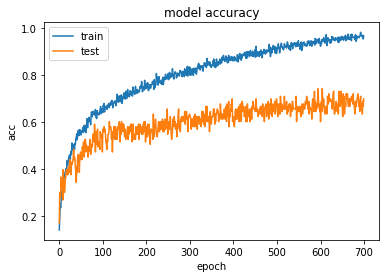

In [38]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

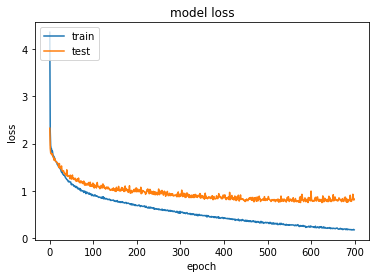

In [37]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [113]:
#save model
model_name = 'Emotion_Voice_Detection_Model_savee.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\ioann\saved_models\Emotion_Voice_Detection_Model_savee.h5 


In [114]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [115]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model_savee.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 69.89%


In [116]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

93/93 [==============================] - 0s 1ms/step


In [117]:
preds

array([[9.72214621e-03, 1.82703659e-01, 2.72176549e-04, 4.33182548e-04,
        1.72870189e-01, 6.33969069e-01, 2.96624530e-05],
       [1.57671529e-05, 1.52465641e-01, 1.07902168e-04, 3.55773159e-06,
        4.78269011e-01, 3.69129241e-01, 8.75446131e-06],
       [1.84776320e-04, 6.77942753e-01, 5.96795289e-04, 8.89200674e-05,
        5.22573129e-04, 3.20002943e-01, 6.61231286e-04],
       [1.72843244e-02, 1.67673250e-04, 3.30005854e-01, 2.31451124e-01,
        3.99381648e-08, 4.46521852e-07, 4.21090603e-01],
       [1.89345464e-01, 2.01867819e-01, 5.26722968e-01, 2.73236800e-02,
        6.90840650e-04, 3.82446265e-03, 5.02247848e-02],
       [4.40858543e-01, 4.40986343e-02, 1.65767834e-01, 2.47645140e-01,
        1.14709837e-03, 5.42592164e-03, 9.50568467e-02],
       [5.34190112e-05, 9.23530012e-03, 1.34856487e-03, 4.30291620e-05,
        3.97308111e-01, 5.91931581e-01, 7.99993941e-05],
       [4.32703091e-04, 8.16606553e-05, 6.34886697e-02, 3.14998813e-02,
        1.05991376e-07, 6

In [118]:
preds1=preds.argmax(axis=1)
preds1

array([5, 4, 1, 6, 2, 0, 5, 6, 3, 3, 4, 5, 0, 2, 6, 0, 6, 4, 0, 0, 4, 6,
       6, 4, 4, 0, 0, 0, 5, 5, 5, 4, 4, 4, 3, 2, 4, 3, 1, 4, 6, 0, 1, 1,
       3, 1, 1, 4, 6, 6, 4, 5, 1, 6, 1, 3, 0, 4, 1, 3, 4, 0, 2, 6, 4, 3,
       4, 2, 2, 6, 4, 4, 6, 2, 4, 4, 6, 4, 0, 3, 4, 6, 4, 2, 2, 4, 1, 4,
       4, 6, 0, 5, 5], dtype=int64)

In [119]:
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))

In [120]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,sad
1,neutral
2,disgusted
3,surprised
4,fearful
5,angry
6,sad
7,surprised
8,happy
9,happy


In [121]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [122]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,neutral
1,neutral
2,disgusted
3,surprised
4,fearful
5,fearful
6,neutral
7,surprised
8,happy
9,angry


In [123]:
finaldf = actualdf.join(preddf)

In [125]:
finaldf

,actualvalues,predictedvalues
0,neutral,sad
1,neutral,neutral
2,disgusted,disgusted
3,surprised,surprised
4,fearful,fearful
5,fearful,angry
6,neutral,sad
7,surprised,surprised
8,happy,happy
9,angry,happy


In [126]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
angry,10
disgusted,12
fearful,16
happy,10
neutral,23
sad,12
surprised,10


In [127]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
angry,13
disgusted,10
fearful,9
happy,9
neutral,27
sad,9
surprised,16
